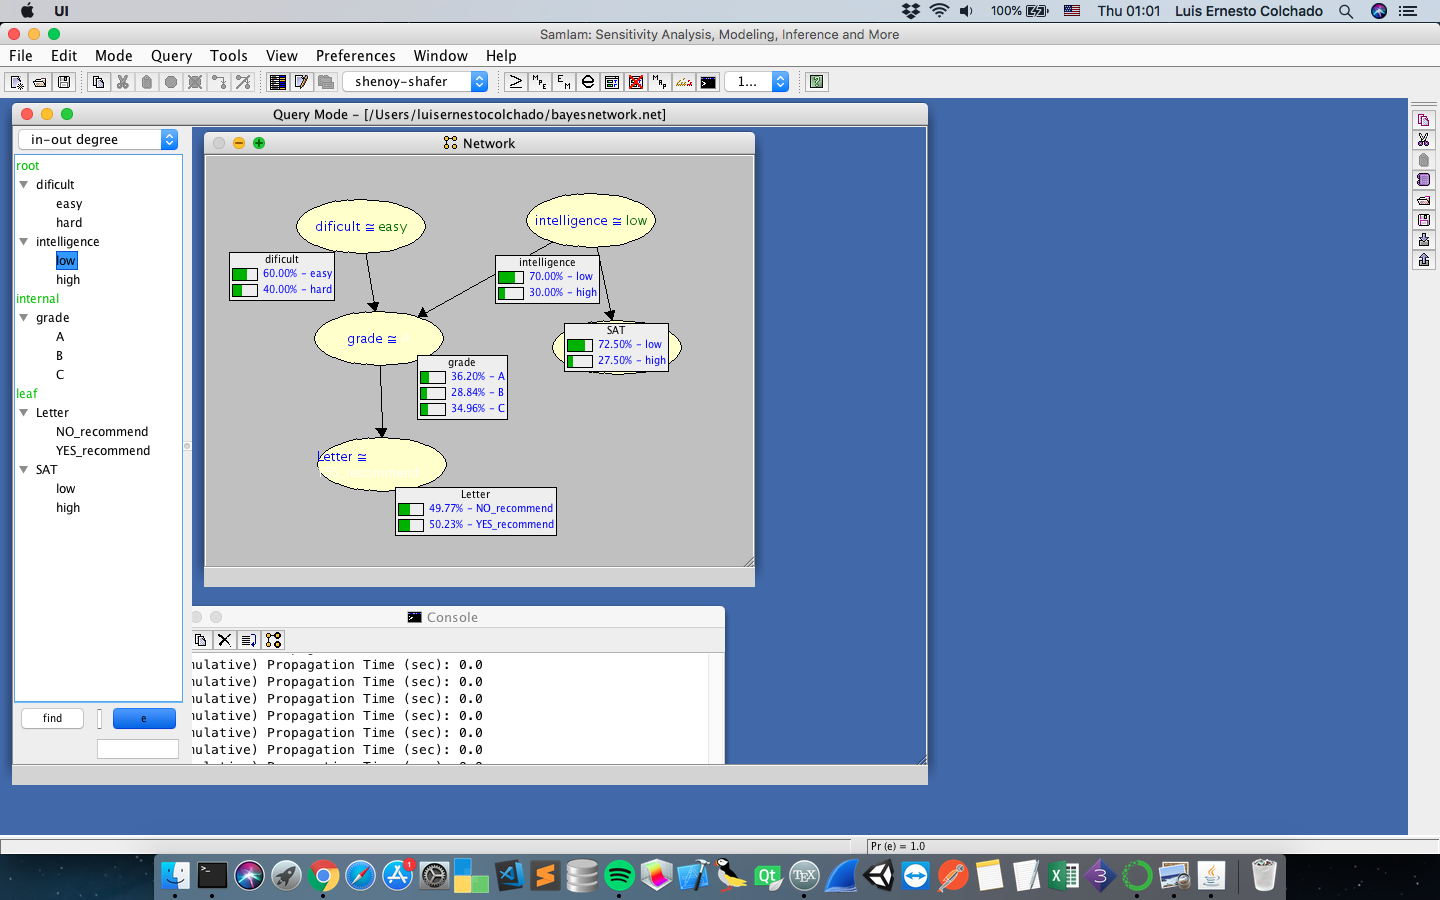

In [1]:
from IPython.display import Image
Image(filename='networkbayes.png')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
difficult = {'easy':[0.6],'hard':[0.4]}
difficult = pd.DataFrame(difficult)
intelligence = {'low':[0.7],'high':[0.3]}
intelligence = pd.DataFrame(intelligence)
grade = {'A':[0.3,0.9,0.05,0.5],'B':[0.4,0.08,0.25,0.3],'C':[0.3,0.02,0.7,0.2]}
grade = pd.DataFrame(grade)
Sat = {'low':[0.95,0.2],'high':[0.05,0.8]}
Sat = pd.DataFrame(Sat)
letter = {'no_recommend':[0.1,0.4,0.99],'yes_recommend':[0.9,0.6,0.01]}
letter = pd.DataFrame(letter)
print("Dificult")
print(difficult)
print("\n")
print("Intelligence")
print(intelligence)

Dificult
   easy  hard
0   0.6   0.4


Intelligence
   low  high
0  0.7   0.3


In [4]:
gradenp = grade.values

In [5]:
def getProbabilityDifficult(value):
    return difficult.loc[0,value]

def getProbabilityIntelligence(value):
    return intelligence.loc[0,value]

In [6]:
for i in range (0,grade.shape[0]) :
    if(i == 0):
        value0 = 'easy'
        value1 = 'low'
    elif(i == 1):
        value0 = 'easy'
        value1 = 'high'
    elif(i == 2):
        value0 = 'hard'
        value1 = 'low'
    else:
        value0 = 'hard'
        value1 = 'high'
    for j in range (0,grade.shape[1]) :
        gradenp[i,j] = gradenp[i,j] *  getProbabilityDifficult(value0) * getProbabilityIntelligence(value1)

In [7]:
sumGrade = gradenp.sum(0)
prob_grade = {'A':[sumGrade[0]],'B':[sumGrade[1]],'C':[sumGrade[2]]}
prob_grade = pd.DataFrame(prob_grade)
print("Grade")
prob_grade.T

Grade


,0
A,0.3620
B,0.2884
C,0.3496


In [8]:
letternp = letter.values

In [9]:
for i in range (0,letter.shape[0]) :    
    for j in range (0,letter.shape[1]) :
        letternp[i,j] = letternp[i,j] * sumGrade[i]

In [10]:
sumLetter = letternp.sum(0)
prob_letter = {'No recommend':[sumLetter[0]],'Yes recommend':[sumLetter[1]]}
prob_letter = pd.DataFrame(prob_letter)
print("Letter")
prob_letter.T

Letter


,0
No recommend,0.497664
Yes recommend,0.502336


In [11]:
satnp = Sat.values
intelligencenp = intelligence.values
print(intelligencenp[0,1])

0.3


In [12]:
for i in range (0,Sat.shape[0]) :    
    for j in range (0,Sat.shape[1]) :
        satnp[i,j] = satnp[i,j] * intelligencenp[0,i]

In [13]:
sumSat = satnp.sum(0)
prob_sat = {'Low':[sumSat[0]],'High':[sumSat[1]]}
prob_sat = pd.DataFrame(prob_sat)
print("Sat")
prob_sat.T

Sat


,0
Low,0.725
High,0.275
